## Lab 1.3 Build a neural network using custom modules

In [206]:
import pandas as pd
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [207]:
# same drill as lab 1.2
data_train = pd.read_csv('dataset/iris_train.csv')

# convert the string classes to 0, 1, 2
data_train.at[data_train['species'] == 'Iris-setosa', ['species']] = 0
data_train.at[data_train['species'] == 'Iris-versicolor', ['species']] = 1
data_train.at[data_train['species'] == 'Iris-virginica', ['species']] = 2

# since it's all numbers, we convert the loaded string numbers to real numbers
data_train = data_train.apply(pd.to_numeric)

In [208]:
# same drill as lab 1.2
data_train_array = data_train.values

# features and target
x_array = data_train_array[:, :4]
y_array = data_train_array[:, 4]

# convert to tensors
X_train = torch.tensor(x_array, dtype=torch.float)
Y_train = torch.tensor(y_array, dtype=torch.long)

In [209]:
# define all sorts of params: number of inputs, hidden neurons, ouptut neurons, learning rate and number of epochs
input_neurons = X_train.size(1)
output_neurons = np.unique(Y_train.data).size
hidden_neurons = 1000
learning_rate = 0.01
num_epochs = 500

In [210]:
# define a customized nn structure
class TwoLayerNet(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(TwoLayerNet, self).__init__()
        # define linear hidden and output layer
        self.hidden = torch.nn.Linear(n_input, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)
    
    # parent class is nn.module, here we must define forward method. ref: https://pytorch.org/docs/stable/generated/torch.nn.Module.html 
    def forward(self, x):
        # forward pass to process hidden neuron values using activation func of sigmoid
        h_input = self.hidden(x)
        h_output = F.sigmoid(h_input)
        y_pred = self.output(h_output)

        return y_pred


In [211]:
# define a nn using cumstomized structure
net = TwoLayerNet(input_neurons, hidden_neurons, output_neurons)

# define loss func
loss_func = torch.nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [212]:
all_losses = []

for epoch in range(num_epochs):
    Y_train_pred = net(X_train)
    loss = loss_func(Y_train_pred, Y_train)
    all_losses.append(loss.item())

    if epoch % 50 == 0:
        _, predicted = torch.max(F.softmax(Y_train_pred, 1), 1)
        correct = sum(predicted.data.numpy() == Y_train.data.numpy())
        total = Y_train.data.size(0)
        print('Epoch [%d/%d] loss: %.4f accuracy: %.2f %%' % (epoch, num_epochs, loss.item(), 100*correct/total))

    # clear gradients before backward pass
    net.zero_grad()

    # backward pass
    loss.backward()

    # update parameters using step function 
    optimizer.step()

Epoch [0/500] loss: 1.0804 accuracy: 30.83 %
Epoch [50/500] loss: 0.6575 accuracy: 97.50 %
Epoch [100/500] loss: 0.5378 accuracy: 97.50 %
Epoch [150/500] loss: 0.4745 accuracy: 98.33 %
Epoch [200/500] loss: 0.4312 accuracy: 98.33 %
Epoch [250/500] loss: 0.3979 accuracy: 98.33 %
Epoch [300/500] loss: 0.3706 accuracy: 98.33 %
Epoch [350/500] loss: 0.3475 accuracy: 98.33 %
Epoch [400/500] loss: 0.3275 accuracy: 98.33 %
Epoch [450/500] loss: 0.3100 accuracy: 98.33 %


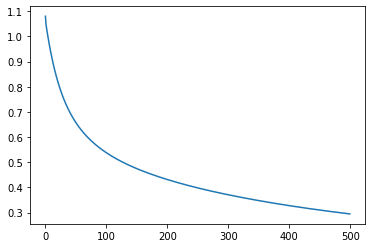

In [213]:
plt.figure()
plt.plot(all_losses)
plt.show()

In [214]:
# use confusion matrix to evalutate results
confusion = torch.zeros(output_neurons, output_neurons)

for i in range(Y_train.data.size(0)):
    actural_class = Y_train.data[i]
    predicted_class = predicted.data[i]
    confusion[actural_class][predicted_class] += 1

print("Confustion matrix for traing:\n", confusion.data.numpy())

Confustion matrix for traing:
 [[37.  0.  0.]
 [ 0. 42.  2.]
 [ 0.  0. 39.]]


### Test data

In [215]:
# load test data
data_test = pd.read_csv('dataset/iris_test.csv')

# same drills
data_test.at[data_test['species'] == 'Iris-setosa', ['species']] = 0
data_test.at[data_test['species'] == 'Iris-versicolor', ['species']] = 1
data_test.at[data_test['species'] == 'Iris-virginica', ['species']] = 2
data_test = data_test.apply(pd.to_numeric)

In [216]:
data_test_array = data_test.values

x_test_array = data_test_array[:, :4]
y_test_array = data_test_array[:, 4]

X_test = torch.tensor(x_test_array, dtype=torch.float)
Y_test = torch.tensor(y_test_array, dtype=torch.long)

In [217]:
Y_test_pred = net(X_test)
_, predicted_test = torch.max(F.softmax(Y_test_pred, 1), 1)

total_test = Y_test.data.size(0)
correct_test = sum(predicted_test.data.numpy() == Y_test.data.numpy())

print('Test accuracy: %.2f %%' % (100*correct_test/total_test))

Test accuracy: 100.00 %


In [218]:
# evaluate using confusion matrix
confusion_test = torch.zeros(output_neurons, output_neurons)
for i in range(Y_test.data.size(0)):
    actural_class = Y_test.data[i]
    predicted_class = predicted_test.data[i]
    confusion_test[actural_class][predicted_class] += 1

print('Confusion matrix for test:\n', confusion_test.data.numpy())

Confusion matrix for test:
 [[13.  0.  0.]
 [ 0.  6.  0.]
 [ 0.  0. 11.]]


_**Q1. What is the classification accuracy?**_

_**Q2. Try running the network with different number of hidden neurons. What effect does it have on the accuracy?**_

_**Q3. What was the best accuracy you were able to achieve? What were the parameters of the neural network?**_

_**Q4. Run the neural network again using the same parameters as your best result. Did you receive the exact same result again? Why might it different?**_

_**Q5. If you have finished the other tasks, try extending the functionality of the neural network and playing around with the parameters, such as the number of hidden neurons and the number of hidden layers. You can try changing the activation functions to others to see what effect this has on the output and error. You can also look into the other types of neural networks and learning algorithms that PyTorch has available.**_

Q1: It varies from 20% to 100% in 5 tests.

Q2: It is steady at 100% on test data for 100 hidden neurons.

Q3: 100%

Q4: It might be slightly different because the initial weight values are random chosen.

Q5: 